In [1]:
#import keras and load the my_keras_fashion_model.h5 file
import tensorflow as tf
from tensorflow import keras
model = keras.models.load_model('my_keras_fashion_model.h5')



In [2]:
## load in the fasion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train, = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Callbacks
### Model Callbacks can provide rollback in case of a system crash. It makes the model save as it goes, with options to save only the best version thus far given your target metric.

### Early Stopping Callbacks indicate how many times a model should try before stopping, lest data be overfitted.
(315, O'Reilly)

In [12]:
#further train the model
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_fashion_model.h5", save_best_only=True, monitor='val_loss')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1577 - accuracy: 0.9433 - val_loss: 0.3556 - val_accuracy: 0.8780
Epoch 2/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1543 - accuracy: 0.9454 - val_loss: 0.2967 - val_accuracy: 0.8982
Epoch 3/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1529 - accuracy: 0.9455 - val_loss: 0.3659 - val_accuracy: 0.8814
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1485 - accuracy: 0.9477 - val_loss: 0.3033 - val_accuracy: 0.8978
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1474 - accuracy: 0.9483 - val_loss: 0.3259 - val_accuracy: 0.8882
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1443 - accuracy: 0.9491 - val_loss: 0.2991 - val_accuracy: 0.8978
Epoch 7/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1429 - accuracy: 0.9493 - val_loss: 0.3012 - val_ac

## There are other types of callbacks beyond the ones above (188, Manning). 

### Learning Rate Schedulers for dynamically adjusting parameters during the training
### Loggers and progress bars

-keras.callbacks.LearningRateScheduler

-keras.callbacks.ReduceLROnPlateau

-keras.callbacks.CSVLogger

# Custom Callbacks
To create your own custom callbacks, extend the keras.callbacks.Callback class. Then implement any of the following methods:

on_epoch_begin(epoch, logs)
on_epoch_end(epoch, logs)
on_batch_begin(batch, logs)
on_batch_end(batch, logs)
on_train_begin(logs)
on_train_end(logs)

In [19]:
from matplotlib import pyplot as plt
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))
    
    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
        label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2912 - accuracy: 0.9016 - val_loss: 0.5540 - val_accuracy: 0.8786
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2824 - accuracy: 0.9037 - val_loss: 0.5050 - val_accuracy: 0.8848
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2846 - accuracy: 0.9047 - val_loss: 0.5114 - val_accuracy: 0.8908
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2779 - accuracy: 0.9073 - val_loss: 0.5186 - val_accuracy: 0.8898
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2745 - accuracy: 0.9084 - val_loss: 0.5189 - val_accuracy: 0.8780
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2768 - accuracy: 0.9091 - val_loss: 0.4999 - val_accuracy: 0.8782
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2696 - accuracy: 0.9110 - val_loss: 0.6291 - val_accuracy:

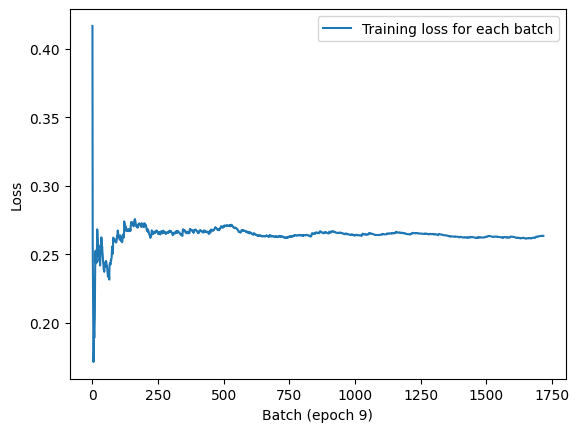

In [20]:

model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(X_train, y_train,epochs=10,callbacks=[LossHistory()],validation_data=(X_valid, y_valid))

# Using TensorBoard for Visualization

Tensorboard is also a great visualization tool to actively view the learning curves during training, and comparing learning curves between multiple runs.